[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/joshmaglione/CS102-Jupyter/main?labpath=.%2FWeek09.ipynb) 

<a href="https://colab.research.google.com/github/joshmaglione/CS102-Jupyter/blob/main/Week09.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 

[View on GitHub](https://github.com/joshmaglione/CS102-Jupyter/blob/main/Week09.ipynb)

# Week 9: Introduction to machine learning

- Machine learning involves building mathematical models to turn data into *information*.

- These models depend on *tunable* parameters that can be adjusted.
  
- In this way the model can be considered to be 'learning' from the data as it tunes the parameters accordingly.

- Once these models have been fit to some data set, sometimes referred to as "trained", they can be used to convert data to information on other data sets. 

- The effectiveness of the model depends many factors, one of which is the size of the training data. 

We will be using `scikit-learn` for much of our ML discussion. 

There isn't just one tool or one 'ML algorithm'.

![](imgs/scikitlearn1.png)

![](imgs/scikitlearn2.png)

## Two flavors

There are two fundamental differences: *supervised* and *unsupervised* 'learning'.

This is simply about the learning or training process.

### Supervised learning

Supervised learning occurs when training data is labeled. 

Examples: 
1. Measurements of different species of Iris are compared against their species labeled to find a pattern.
2. Determining a continuous function, so that events can be predicted in the future.

The first example above is discrete and labeled a *classification task*.

The second example is continuous and lebeled a *regression task*.

Another classification example: 

Blueberry muffin or chihuahua? 

![](imgs/blueberry_chihuahua.jpeg)

Let's look at the Iris dataset again.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
sklearn.__version__

'1.4.0'

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

## Classification of Irises

Let's load the iris data set.

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()

In [7]:
ser = pd.Series(iris.target_names[iris.target], name='species')
df_labeled = pd.DataFrame(
	iris.data, 
	columns=iris.feature_names, 
	index=ser,
)

In [8]:
df_labeled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2


We can get some quick info about the individual species.

In [9]:
(df_labeled
	.query('species == "setosa"')
	.describe()
)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


Let's try to visualize their differences.

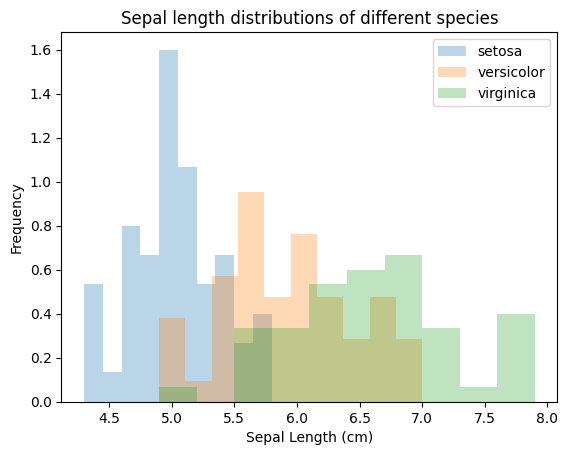

In [10]:
setosa_sepal = df_labeled.query("species == 'setosa'")['sepal length (cm)']
versicolor_sepal = df_labeled.query("species == 'versicolor'")['sepal length (cm)']
virginica_sepal = df_labeled.query("species == 'virginica'")['sepal length (cm)']

# Three overlayed histograms helps to compare distributions
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=10)

# Plots 
plt.hist(setosa_sepal, label='setosa', **kwargs)
plt.hist(versicolor_sepal, label='versicolor', **kwargs)
plt.hist(virginica_sepal, label='virginica', **kwargs)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.legend()
plt.title('Sepal length distributions of different species')
_ = plt.show()

Instead of viewing the three separated, let's stack them.

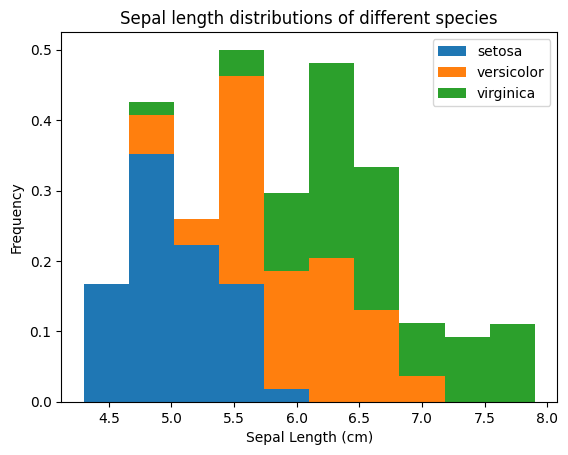

In [11]:
sepaldata = [setosa_sepal, versicolor_sepal, virginica_sepal]

kwargs = dict(histtype='barstacked', density=True, bins=10)

plt.hist(sepaldata,  label=['setosa','versicolor','virginica'], **kwargs)
plt.xlabel("X axis label")
plt.ylabel("Y axis label")
plt.legend()
plt.title('Sepal length distributions of different species')
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
_ = plt.show()

Remember the plot we did last week comparing lots of pairs of variables? 

We can do something similar very easily with `pandas`.

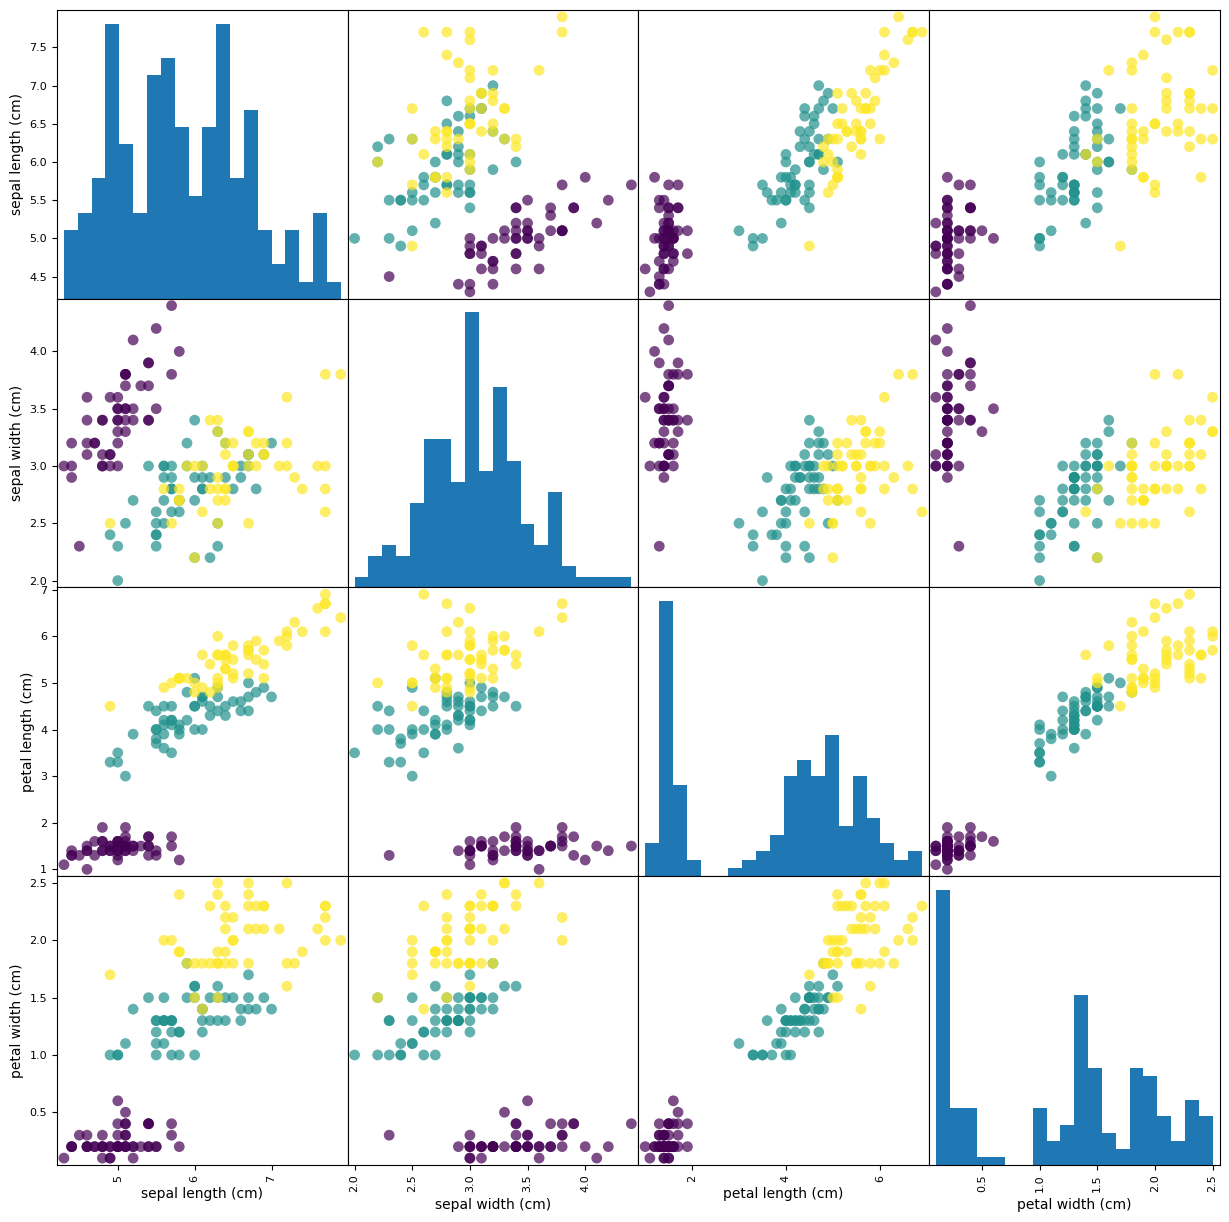

In [12]:
pd.plotting.scatter_matrix(
	df_labeled, 
	c=iris.target, 
	figsize=(15, 15), 
	marker='o', 
	hist_kwds={'bins': 20}, 
	s=60, 
	alpha=.7
)
plt.show()

## Building the model